# Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('bigdatamart_Train.csv')

In [3]:
df_test=pd.read_csv('bigdatamart_Test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.ndim

2

In [7]:
df_train.shape

(8523, 12)

In [8]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_train['Item_Weight']=df_train['Item_Weight'].replace(np.nan, np.mean(df_train['Item_Weight']))

In [11]:
df_train['Item_Weight'].isnull().sum()

0

In [12]:
md=df_train['Outlet_Size'].mode()
md

0    Medium
dtype: object

In [13]:
df_train['Outlet_Size']=df_train['Outlet_Size'].replace(np.nan, 'Medium')

In [14]:
df_train['Outlet_Size'].isnull().sum()

0

In [15]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le= LabelEncoder()

In [18]:
df_train['Item_Identifier']=le.fit_transform(df_train['Item_Identifier'])

In [19]:
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])

In [20]:
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])

In [21]:
df_train['Outlet_Identifier']=le.fit_transform(df_train['Outlet_Identifier'])

In [22]:
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])

In [23]:
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])

In [24]:
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])

In [25]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [26]:
df_train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [27]:
#UniVariate Analysis

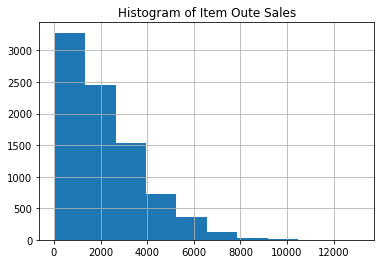

In [28]:
df_train['Item_Outlet_Sales'].hist(grid=True)
plt.title('Histogram of Item Oute Sales')
plt.show()

In [29]:
#Bivariate Analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


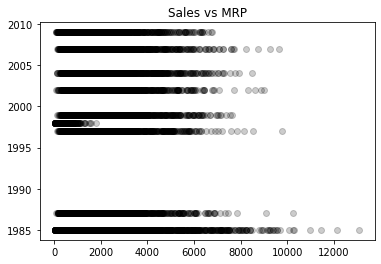

In [30]:
plt.scatter(df_train['Item_Outlet_Sales'],df_train['Outlet_Establishment_Year'], alpha=0.2, c=(0,0,0))
plt.title('Sales vs MRP')
plt.show()

In [31]:
#Multivariate Analysis

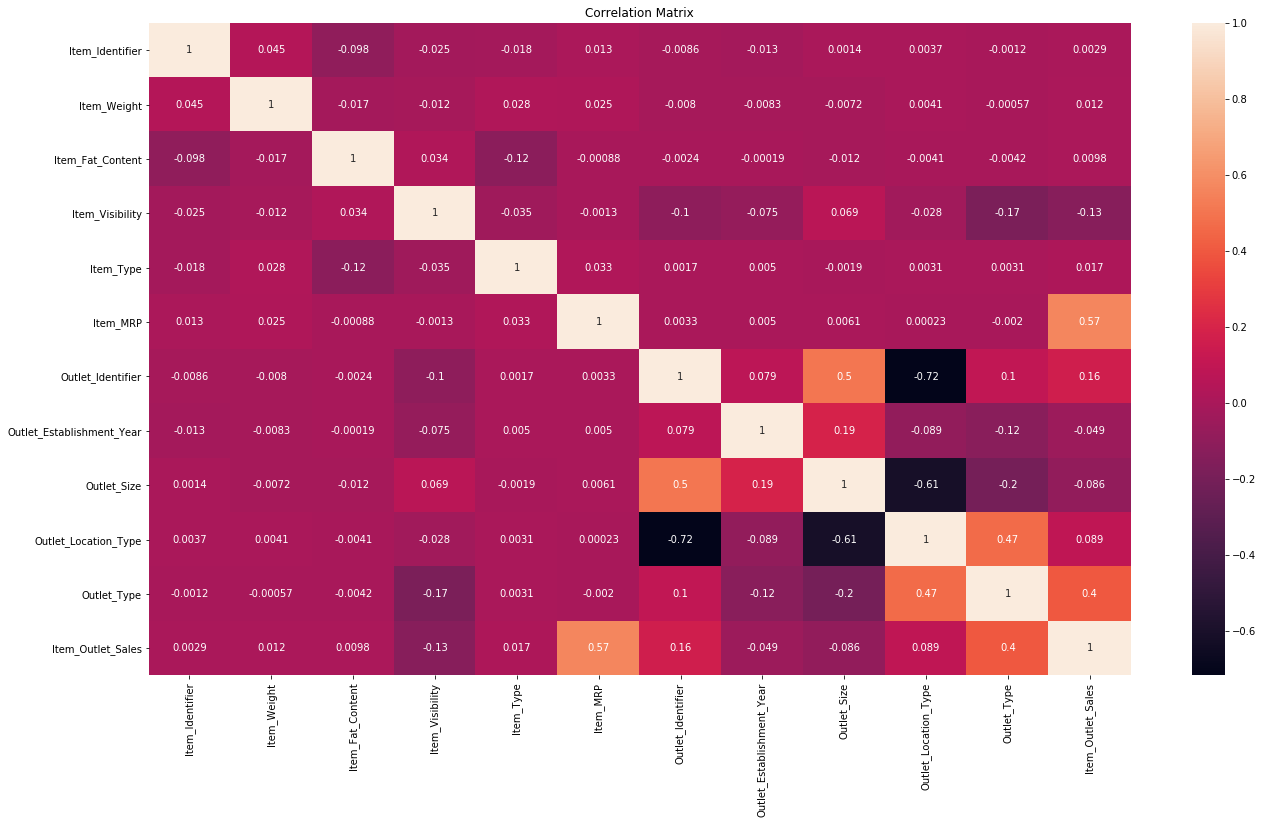

In [32]:
corr_mat= df_train.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
#Splitting x and y:

In [34]:
x=df_train.drop('Item_Outlet_Sales', axis=1)

In [35]:
y=df_train['Item_Outlet_Sales']

In [36]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1


In [37]:
#Finding Outliers

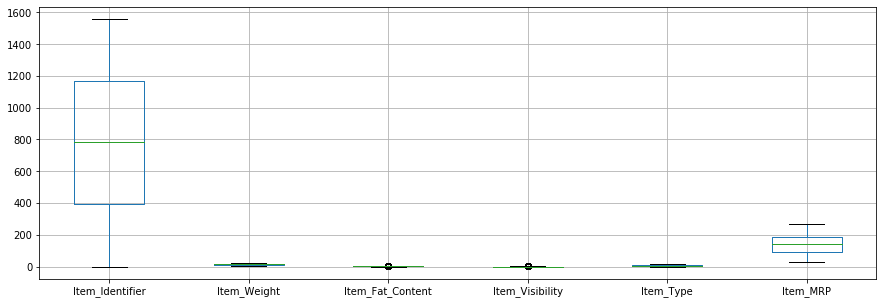

In [38]:
x.iloc[:,0:6].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

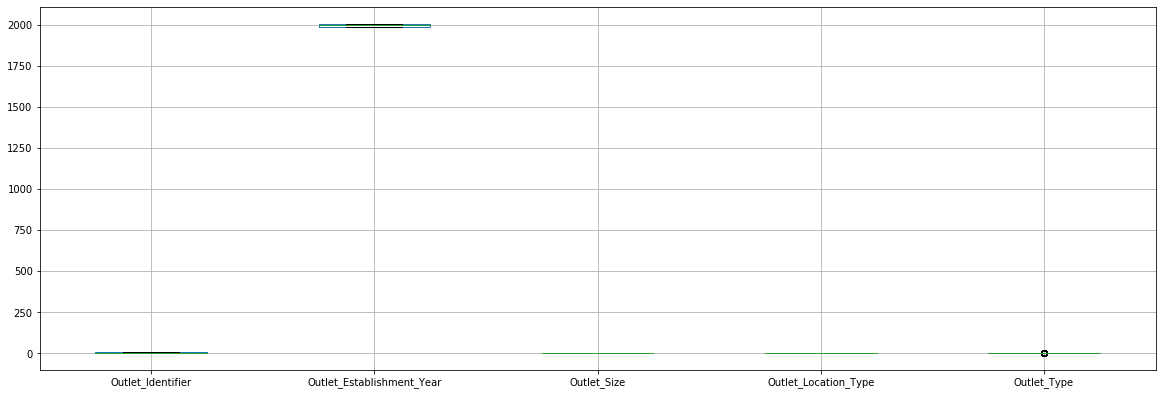

In [39]:
x.iloc[:,6::].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [40]:
#from scipy import stats

In [41]:
#x_train['Outlet_Type']=stats.zscore(x_train['Outlet_Type'])

In [42]:
x.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
dtype: float64

In [43]:
from sklearn.preprocessing import power_transform

In [44]:
pt=power_transform(x, method='yeo-johnson', standardize=True)
df_new=pd.DataFrame(pt, columns=x.columns )
x=df_new
x.skew()

C:\Users\Rahul\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Rahul\anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Item_Identifier             -0.293700
Item_Weight                 -0.068024
Item_Fat_Content             0.032643
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.042980
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

In [45]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.461039,-0.822636,-0.520977,-1.146886,-0.712347,1.623670,1.427394,0.048562,-0.293295,-1.373843,-0.123488
1,-2.093858,-1.733801,1.009871,-1.037100,1.504660,-1.595016,-0.548577,1.461925,-0.293295,1.088324,1.040591
2,-0.154018,1.086362,-0.520977,-1.122375,0.684390,0.081237,1.427394,0.048562,-0.293295,-1.373843,-0.123488
3,0.773522,1.447728,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.075796,-0.293295,1.088324,-1.915952
4,1.098294,-0.917588,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.270835,-1.925925,1.088324,-0.123488


In [46]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [47]:
df_test.shape

(5681, 11)

In [48]:
df_test.ndim

2

In [49]:
df_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [50]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [51]:
df_test['Item_Weight']=df_test['Item_Weight'].replace(np.nan,df_test['Item_Weight'].mean() )

In [52]:
df_test['Item_Weight'].isnull().sum()

0

In [53]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [54]:
df_test['Outlet_Size'].isnull().sum()

1606

In [55]:
a=df_test['Outlet_Size'].mode()
a

0    Medium
dtype: object

In [56]:
df_test['Outlet_Size']=df_test['Outlet_Size'].replace(np.nan,'Medium')

In [57]:
df_test['Outlet_Size'].isnull().sum()

0

In [58]:
df_test['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [59]:
df_test['Item_Identifier']=le.fit_transform(df_test['Item_Identifier'])

In [60]:
df_test['Item_Fat_Content']=le.fit_transform(df_test['Item_Fat_Content'])

In [61]:
df_test['Item_Type']=le.fit_transform(df_test['Item_Type'])

In [62]:
df_test['Outlet_Identifier']=le.fit_transform(df_test['Outlet_Identifier'])

In [63]:
df_test['Outlet_Location_Type']=le.fit_transform(df_test['Outlet_Location_Type'])

In [64]:
df_test['Outlet_Type']=le.fit_transform(df_test['Outlet_Type'])

In [65]:
df_test['Outlet_Size']=le.fit_transform(df_test['Outlet_Size'])

In [66]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3


In [67]:
df_test.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


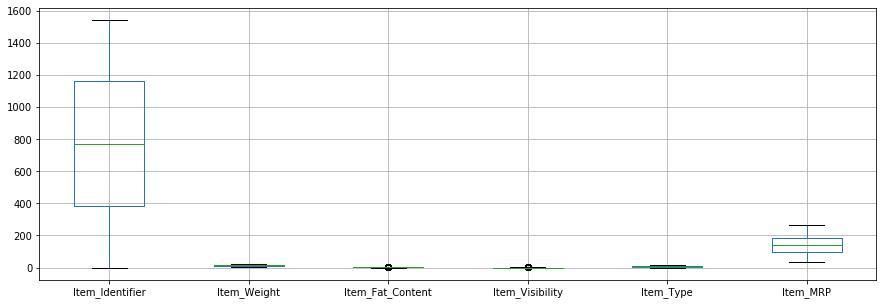

In [68]:
df_test.iloc[:,0:6].boxplot(figsize=[15,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

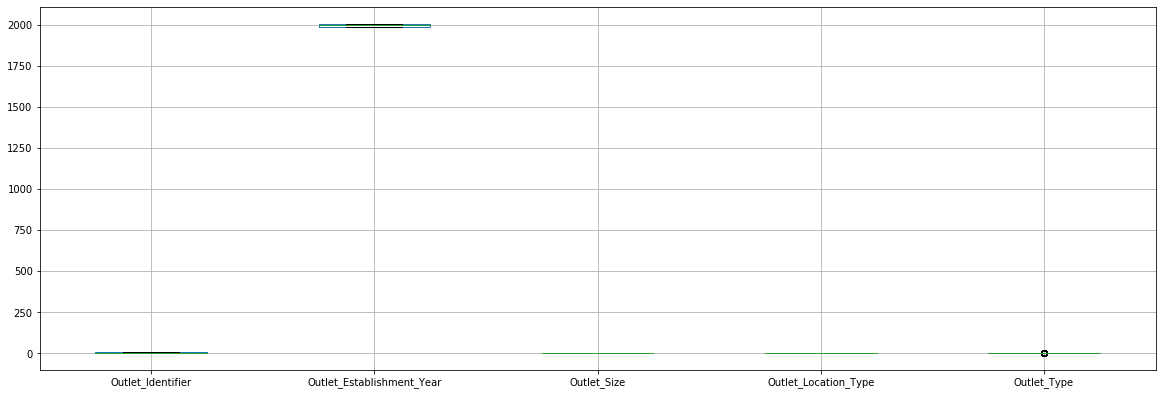

In [69]:
df_test.iloc[:,6::].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [70]:
df_test.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [71]:
ptn=power_transform(df_test, method='yeo-johnson', standardize=True)
df=pd.DataFrame(ptn,columns=df_test.columns)
df_test=df
df_test.skew()

C:\Users\Rahul\anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Rahul\anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Item_Identifier             -0.285982
Item_Weight                 -0.060915
Item_Fat_Content             0.032646
Item_Visibility              0.116776
Item_Type                   -0.167431
Item_MRP                    -0.111040
Outlet_Identifier           -0.214064
Outlet_Establishment_Year   -0.200515
Outlet_Size                 -0.042981
Outlet_Location_Type        -0.220642
Outlet_Type                  0.007830
dtype: float64

In [72]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.757467,1.770074,-0.524089,-1.462069,1.301686,-0.472017,1.427400,0.048870,-0.293457,-1.373745,-0.123533
1,0.688618,-1.036193,3.194132,-0.448019,-0.712433,-0.835998,-0.931096,1.153252,-0.293457,-0.131020,-0.123533
2,1.313595,0.491675,-0.524089,0.871342,0.892240,1.525375,-1.809079,-0.075491,-0.293457,1.088300,-1.915753
3,0.173359,-1.306479,-0.524089,-1.175927,1.301686,0.290835,-0.931096,1.153252,-0.293457,-0.131020,-0.123533
4,0.910050,0.059211,1.015635,1.153823,-0.712433,1.424528,0.156937,-1.457044,-0.293457,1.088300,1.922271


In [73]:
#Importing Linear Algorithm Algorithm

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=1000)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr=LinearRegression()

In [78]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_pred=lr.predict(x_test)

In [80]:
y_pred

array([4901.38128711,  915.1400072 , 2926.83818191, ..., 2651.61192668,
       2455.19743183, 1197.84282419])

In [81]:
#Evaluting the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 884.2778849476284
Mean Squared Error: 1389831.2466222295
Root Mean Squared Error: 1178.9110427094274


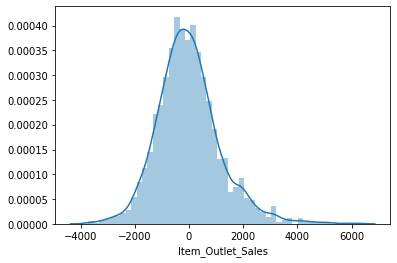

In [82]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [83]:
#Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
scr= cross_val_score(lr, x, y, cv=5)

In [86]:
print('cross validation score is :', scr.mean())

cross validation score is : 0.521095064381212


In [87]:
#Apply Ridge and Gridsearchcv to improve our model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [88]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
-1393018.7188013142


In [92]:
import joblib
joblib.dump(ridge_regressor,"bigdata.pkl")

['bigdata.pkl']

In [93]:
#Load Model

In [94]:
mod=joblib.load("bigdata.pkl")

In [95]:
predicted_values=mod.predict(df_test)

In [96]:
print("After Save",predicted_values)

After Save [2045.01300708 1262.9055094  1839.34362605 ... 1843.6358059  3196.64410993
 1198.29735043]
